<a href="https://colab.research.google.com/github/z-tejani/StcokPricePredictor/blob/main/Apple_Stock_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apple Stock Price Predictor
Using Long Short Term Memory (LSTM) to predict closing price for AAPL using the prices in the last 60 days.

In [ ]:
import math
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
#pip install yfinance
import yfinance as yfin
yfin.pdr_override()
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date

In [ ]:
#Get the stock quote
df = pdr.get_data_yahoo("AAPL", start="2012-01-01", end=date.today())
df.head()
df.head(-5)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.575912,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.643499,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.783868,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.917509,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.897019,394024400
...,...,...,...,...,...,...
2022-02-16,171.850006,173.339996,170.050003,172.550003,172.550003,61177400
2022-02-17,171.029999,171.910004,168.470001,168.880005,168.880005,69589300
2022-02-18,169.820007,170.539993,166.190002,167.300003,167.300003,82772700


In [ ]:
#num rows and cols?
df.shape

(2558, 6)

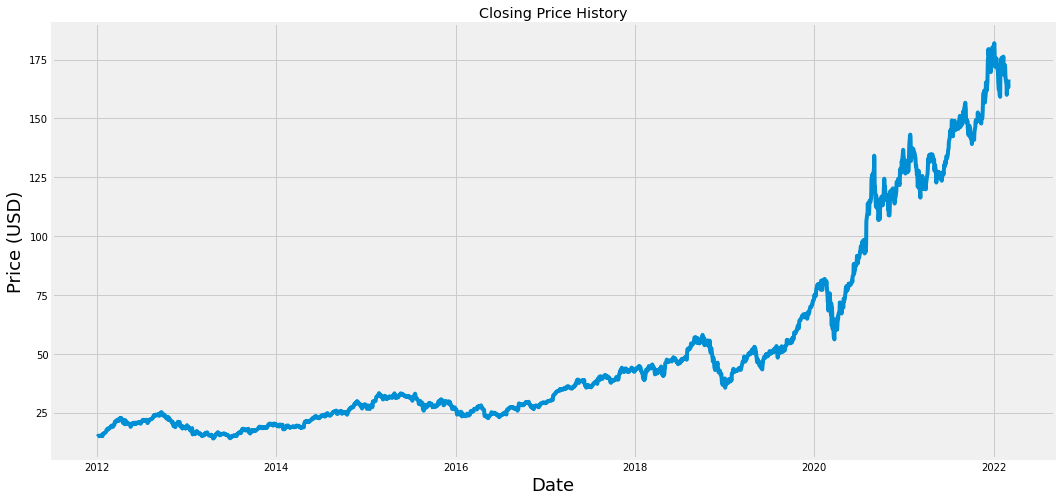

In [ ]:
#Vizualize Closing History
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price (USD)', fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Close']) #creating new df with only close column
dataset = data.values #conv to a numpy array

In [ ]:
#compute amount of rows to train with
traininglen = math.ceil(len(dataset)*.75)
traininglen

1919

In [ ]:
#scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.89950167],
       [0.88807736],
       [0.90806993]])

In [ ]:
#Create the training dataset
#Create the scaled dataset
train_data = scaled_data[0:traininglen, :]
#Split the data into x_train and y_train
x_train = [] #will contain arrays of the past 60 values
y_train = [] #will contain the 61st values... the one we want to predict

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61: #visualize what is happening by pulling the first 2 arrays in each
    print(x_train)
    print(y_train)
    print()


[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train) #convert to numpy
x_train.shape

(1859, 60)

In [ ]:
#reshaping the data for lstm
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
#building the lstm model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#training model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1859/1859 [==============================] - 70s 34ms/step - loss: 1.3864e-04


In [ ]:
#create the testing dataset
test_data = scaled_data[traininglen - 60 :, :]
x_test = []
y_test = dataset[traininglen:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test.shape

(639, 60)

In [ ]:
#reshape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(639, 60, 1)

In [ ]:
#get model predicted vals
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #undo the scaling
#predictions

In [ ]:
#evaluate model with rmse
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

1.3976032991364529

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


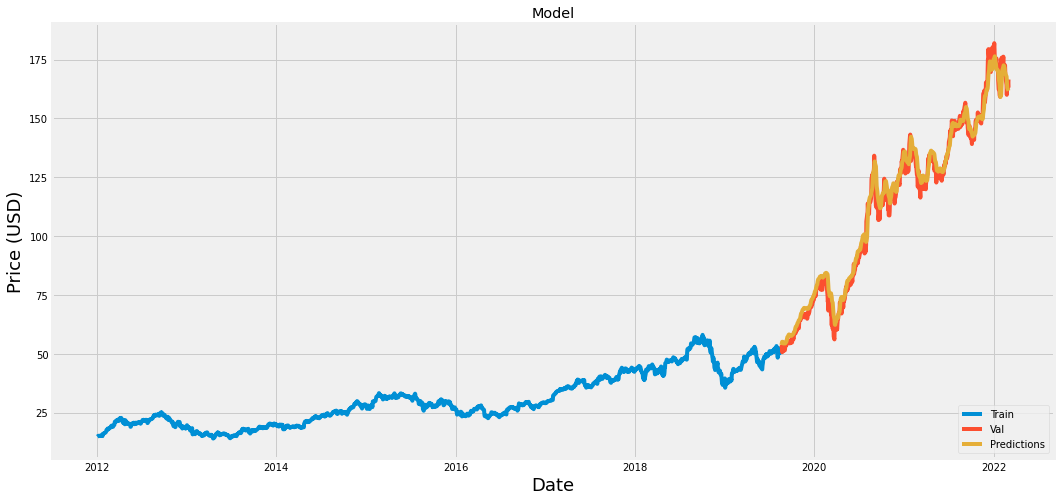

In [ ]:
#plot data
train = data[:traininglen]
validation = data[traininglen:]
validation["Predictions"] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price (USD)', fontsize=18)
plt.plot(train['Close'])
plt.plot(validation[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#show the valid and predicted prices
validation

,Close,Predictions
Date,,
2019-08-20,52.590000,53.729706
2019-08-21,53.160000,54.158752
2019-08-22,53.115002,54.634819
2019-08-23,50.660000,55.064487
2019-08-26,51.622501,55.051853
...,...,...
2022-02-24,162.740005,164.557312
2022-02-25,164.850006,163.002960
2022-02-28,165.119995,162.206772


In [ ]:
#make the prediction for next price
#get quote
new_df = df.filter(['Close'])
last60 = new_df[-60:].values #get the last 60 days into a np array
last60scaled = scaler.transform(last60) #scale the data
X_test = []
X_test.append(last60scaled)
X_test = np.array(X_test) #convert to np array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) #reshape for lstm
predprice = model.predict(X_test) #get predicted scaled prices
predprice = scaler.inverse_transform(predprice) #undo scaling
print(f"Tomorrow's Price Prediction: ${predprice[0][0]}")

Tomorrow's Price Prediction: $162.1744384765625
